In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# grid search ARIMA parameters for time series
import math  
import warnings
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error

plt.style.use('fivethirtyeight')


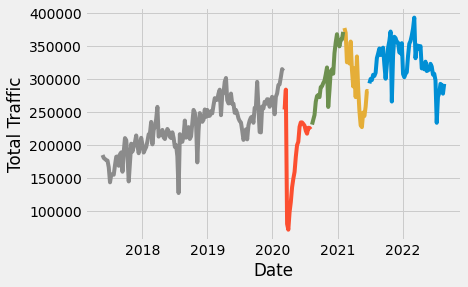

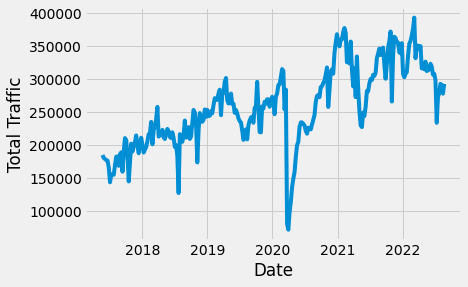

In [3]:
# Import the dataframe
train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Road Toll/Train.csv')
test1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Road Toll/Test 1.csv')
test2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Road Toll/Test 2.csv')
omit1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Road Toll/Omit1.csv')
omit2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Road Toll/Omit2.csv')

totaltraffic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Road Toll/TotalTraffic.csv')




# Convert date column to datetime
train['Date'] = pd.to_datetime(train['Date'])
test1['Date'] = pd.to_datetime(test1['Date'])
test2['Date'] = pd.to_datetime(test2['Date'])
omit1['Date'] = pd.to_datetime(omit1['Date'])
omit2['Date'] = pd.to_datetime(omit2['Date'])
totaltraffic['Date'] = pd.to_datetime(totaltraffic['Date'])


train.index = train['Date']
test1.index = test1['Date']
test2.index = test2['Date']
omit1.index = omit1['Date']
omit2.index = omit2['Date']
totaltraffic.index = totaltraffic['Date']



del train['Date']
del test1['Date']
del test2['Date']
del omit1['Date']
del omit2['Date']
del totaltraffic['Date']


#Covert Traffic column from strin to float
train['Traffic'] = train['Traffic'].astype(float)
test1['Traffic'] = test1['Traffic'].astype(float)
test2['Traffic'] = test2['Traffic'].astype(float)
omit1['Traffic'] = omit1['Traffic'].astype(float)
omit2['Traffic'] = omit2['Traffic'].astype(float)
totaltraffic['Traffic'] = totaltraffic['Traffic'].astype(float)


plt.xlabel('Date')
plt.ylabel('Total Traffic')
plt.plot(test2)
plt.plot(omit1)
plt.plot(omit2)
plt.plot(test1)
plt.plot(train)
plt.show()

plt.xlabel('Date')
plt.ylabel('Total Traffic')
plt.plot(totaltraffic)
plt.show()

In [4]:
# # evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(xtrain, xtest1, xtest2, arima_order):
    mod = sm.tsa.statespace.SARIMAX(xtrain,
                                    order=arima_order,
                                    seasonal_order=(1, 1, 0, 52),
                                    trend="n",
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)


    #Fit model 
    results = mod.fit()
    
    #Get predictions for lenth of test set
    multistepforecast = results.get_forecast(steps=400)

    predict = pd.DataFrame(multistepforecast.predicted_mean)
    predict["Date"] = (predict.index).to_pydatetime()

    split_date_one = datetime.datetime(2020,8,10)
    split_date_two = datetime.datetime(2021,2,7)
    forecastperiod1 = predict[(predict["Date"] >= split_date_one) & (predict["Date"] <= split_date_two)]

    split_date_three = datetime.datetime(2021,6,28)
    split_date_four = datetime.datetime(2022,8,22)
    forecastperiod2 = predict[(predict["Date"] >= split_date_three) & (predict["Date"] <= split_date_four)]

    forecast_p1andp2 = pd.concat([forecastperiod1["predicted_mean"], forecastperiod2["predicted_mean"]])
    test_p1and2 = pd.concat([test1["Traffic"], test2["Traffic"]])



    rmse = sqrt(mean_squared_error(test_p1and2, forecast_p1andp2))
    mape = mean_absolute_percentage_error(test_p1and2, forecast_p1andp2)

    print("Errors:",mape,rmse)
    return rmse









# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(xtrain, xtest1, xtest2, p_values, d_values, q_values):
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					error = evaluate_arima_model(xtrain, xtest1, xtest2, order)
					if error < best_score:
						best_score, best_cfg = error, order
					print('ARIMA%s error=%.3f' % (order,error))
				except:
					continue
	print('\nBest ARIMA%s error=%.3f' % (best_cfg, best_score))
	




# evaluate parameters
p_values = range(12, 15)
d_values = range(0, 2)
q_values = range(0, 15)
warnings.filterwarnings("ignore")
evaluate_models(train, test1, test2, p_values, d_values, q_values)

Errors: 0.13195975623738904 49599.808736513165
ARIMA(12, 0, 0) error=49599.809
Errors: 0.1315203029428825 49451.30490562115
ARIMA(12, 0, 1) error=49451.305
Errors: 0.6926279479144513 270284.42787105613
ARIMA(12, 0, 2) error=270284.428
Errors: 0.1311506529433393 53090.2830665151
ARIMA(12, 0, 3) error=53090.283
Errors: 0.12947695420803693 52323.88822459142
ARIMA(12, 0, 4) error=52323.888
Errors: 2.6127636329769837e+184 inf
ARIMA(12, 0, 5) error=inf
Errors: 32558472.86491301 28421696557934.574
ARIMA(12, 0, 7) error=28421696557934.574
Errors: 0.13156568780265349 52787.036117348296
ARIMA(12, 0, 8) error=52787.036
Errors: 0.08753348248929729 34020.19858750435
ARIMA(12, 0, 9) error=34020.199
Errors: 0.6458081566670211 252737.32526597512
ARIMA(12, 0, 10) error=252737.325
Errors: 0.19547489865941847 77222.77080526447
ARIMA(12, 0, 11) error=77222.771
Errors: 0.12893437329947655 51585.05693134333
ARIMA(12, 0, 12) error=51585.057
Errors: 0.09834215509401238 41913.08891661846
ARIMA(12, 0, 13) error